## 💰🔑"Predicting Income Levels with Machine Learning: Unlocking Insights from Data"🔑💰

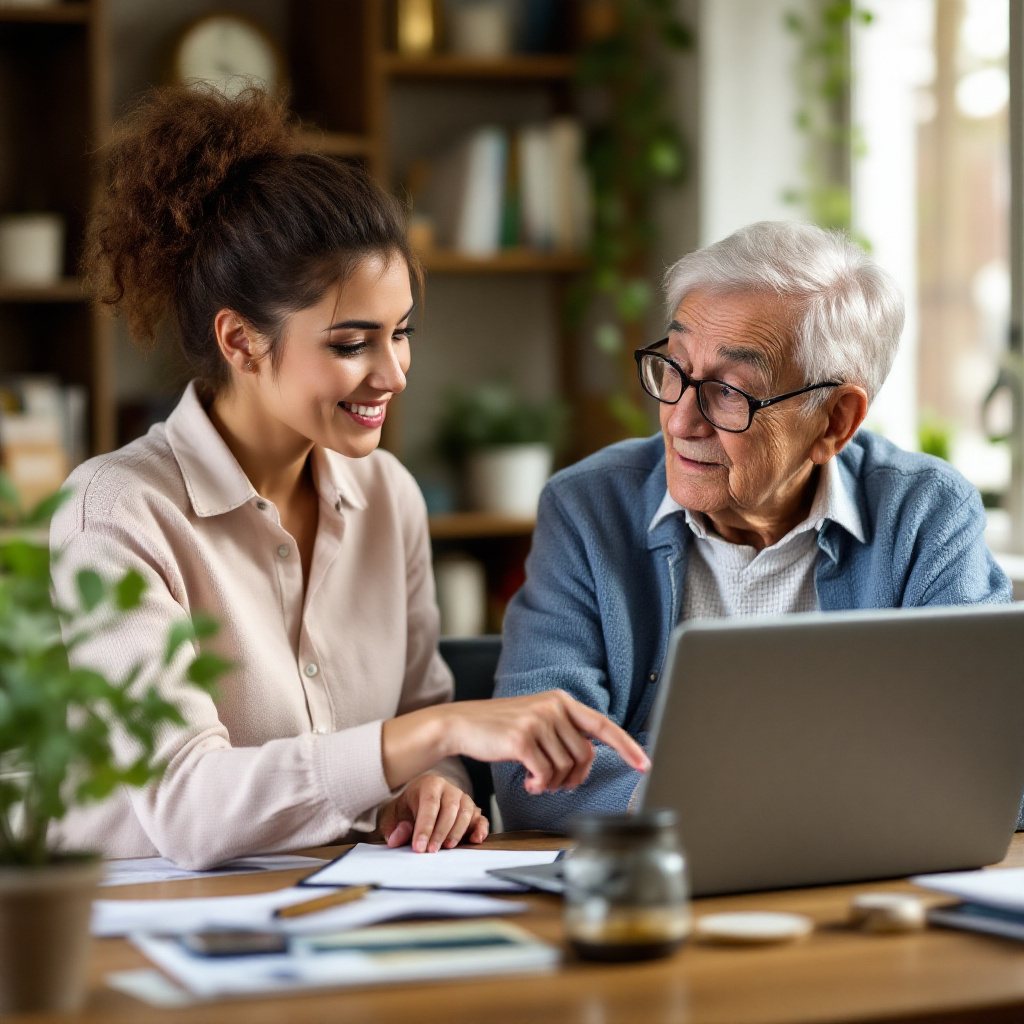

## 👩Name : Navya R Nair

## 🏛️ Organization : Entri Elevate

### 📆 Date:30/01/2025 

## 1.🎯Project Objective:

#### The project aims to predict income levels (e.g., above or below $50k) based on demographic and work-related attributes using machine learning models. This is a classification problem.

## 2.🔍Dataset Overview:

#### Source: Provide the dataset source (e.g., UCI Adult dataset).
#### Features: Briefly highlight key features such as age, education, occupation, marital status, hours worked, etc.
#### Target Variable: Income level (binary: >$50K or <=$50K).

## 3.🔄Approach:

##### Data Preprocessing: Address steps like handling missing values, encoding categorical data, and scaling numerical features.
##### Exploratory Data Analysis (EDA): Visualize key trends, correlations, and distributions.
##### Model Building:  Mention models used (e.g., Logistic Regression, Random Forest, XGBoost) and highlight their advantages.
##### Evaluation Metrics:  Focus on accuracy, precision, recall, and ROC-AUC.

## 4.🌟Features:

#### 📍Age: (Numerical) The age of the individual.
#### 📍Workclass: (Categorical) The type of employment, e.g.:
##### 🔹Private
##### 🔹Self-emp-not-inc
##### 🔹Self-emp-inc
##### 🔹Federal-gov, etc.
#### 📍Fnlwgt: (Numerical) Final weight, a demographic weight that indicates the importance of the record.
#### 📍Education: (Categorical) The highest level of education achieved, e.g.:
##### 🔹Bachelors
##### 🔹HS-grad
##### 🔹11th
##### 🔹Masters, etc.
#### 📍Education-num: (Numerical) Number of years of education.
#### 📍Marital_status: (Categorical) Marital state, e.g.:
##### 🔹Married-civ-spouse
##### 🔹Never-married
##### 🔹Divorced, etc.
#### 📍Occupation: (Categorical) The individual's type of occupation, e.g.:
##### 🔹Tech-support
##### 🔹Craft-repair
##### 🔹Sales
##### 🔹Exec-managerial, etc.
#### 📍Relationship: (Categorical) Relationship within a household, e.g.:
##### 🔹Husband
##### 🔹Wife
##### 🔹Own-child
##### Not-in-family, etc.
#### 📍Race: (Categorical) Ethnicity of the individual, e.g.:
##### 🔹White
##### 🔹Black
##### 🔹Asian-Pac-Islander
##### 🔹Amer-Indian-Eskimo, etc.
#### 📍Gender: (Categorical) Male or Female.
#### 📍Capital-gain: (Numerical) Income from investment sources, such as stocks or property.
#### 📍Capital-loss: (Numerical) Losses from investments.
#### 📍Hours-per-week: (Numerical) The number of hours worked per week.
#### 📍Native_country: (Categorical) Country of origin, e.g.:
##### 🔹United-States
##### 🔹Mexico
##### 🔹India, etc.

### ➡️Import Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,kurtosis
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import joblib
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV

### Loading Data⏳

In [13]:
data = pd.read_csv('adult_cleaned.csv')

In [14]:
df = pd.DataFrame(data)

### Exploratory Data Analysis

In [16]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
df.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [19]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [20]:
df.shape

(32561, 15)

##### Missing Values Analysis
##### Process: Check for missing or null values in the dataset. Missing data could indicate errors or require imputation.

In [22]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [23]:
df.duplicated().sum()

24

#### Remove Duplicates

In [25]:
df.drop_duplicates(inplace = True)

In [26]:
df.duplicated().sum()

0

In [27]:
num_columns =df.select_dtypes(include = 'number')

In [28]:
num_columns

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [29]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

### Visualize Outliers through Boxplot

#### Outlier Detection
##### Process: Identify anomalies in numerical features.
##### Visualization: Box plot for numerical columns.
##### Handling: Outliers can be removed or capped depending on their impact.

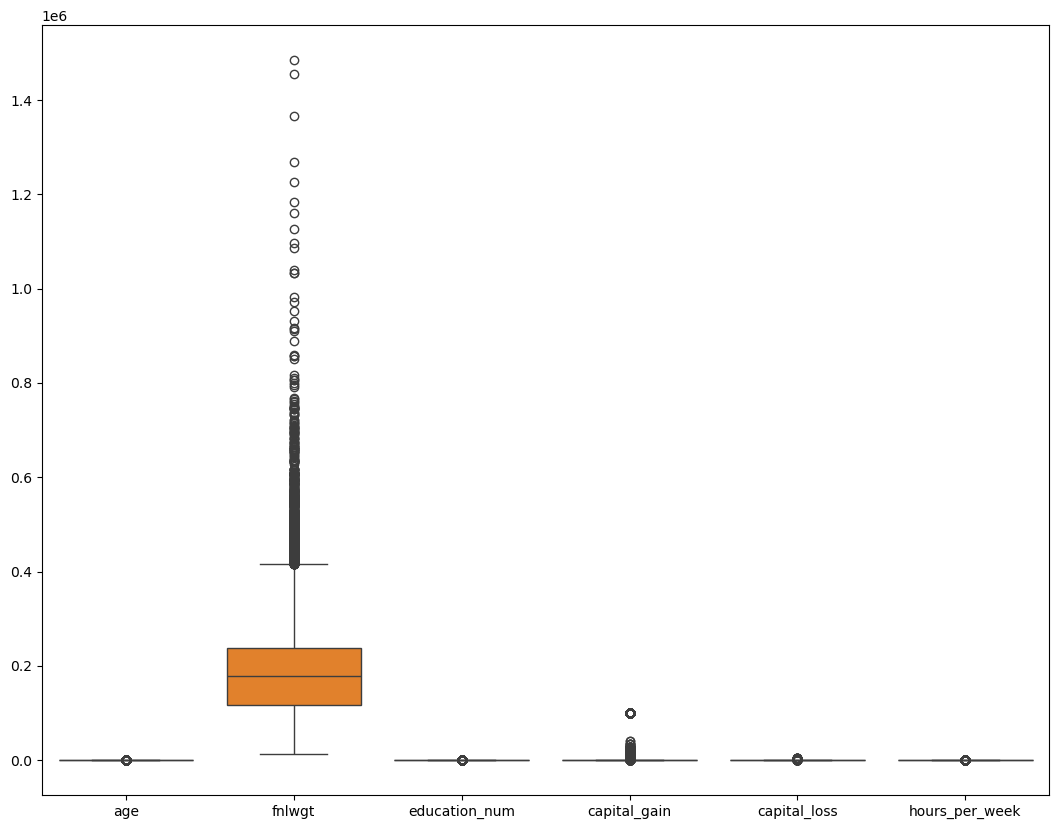

In [32]:
plt.figure(figsize=(13,10))
sns.boxplot(df)
plt.show()

#### Handling Outliers

In [34]:
def handling_outliers(df):
    for col in df.select_dtypes(include=['int64','float64']).columns:
        q1= df[col].quantile(0.25)
        q3= df[col].quantile(0.75)
        iqr = q3 -q1
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)

#capping outliers
        df[col]=df[col].apply(lambda  x:lower if x < lower else upper if x > upper else x)

    return df

In [35]:
#change name for change outlier
df1 = handling_outliers(df)

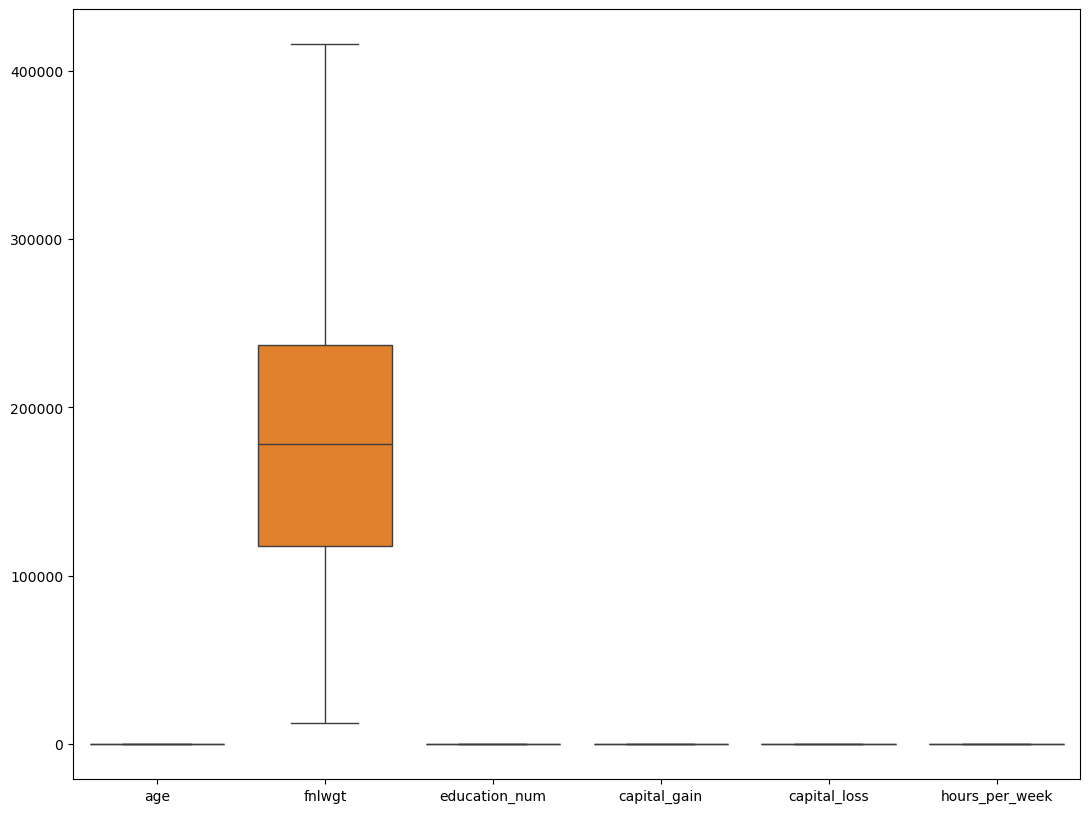

In [36]:
plt.figure(figsize=(13,10))
sns.boxplot(df1)
plt.show()

In [37]:
# Calculate skewness for numerical features
numerical_features = df.select_dtypes(include=np.number).columns
skewness_values = df[numerical_features].skew()

In [38]:
# Print or use the skewness values
skewness_values

age               0.513435
fnlwgt            0.548158
education_num    -0.033530
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.438212
dtype: float64

<Axes: ylabel='Count'>

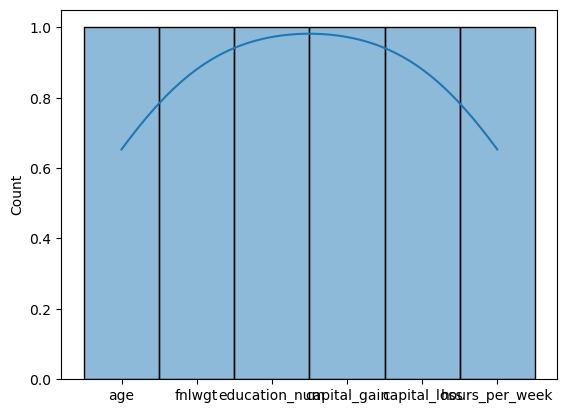

In [39]:
sns.histplot(data = numerical_features, kde = True)

## Visualization📈

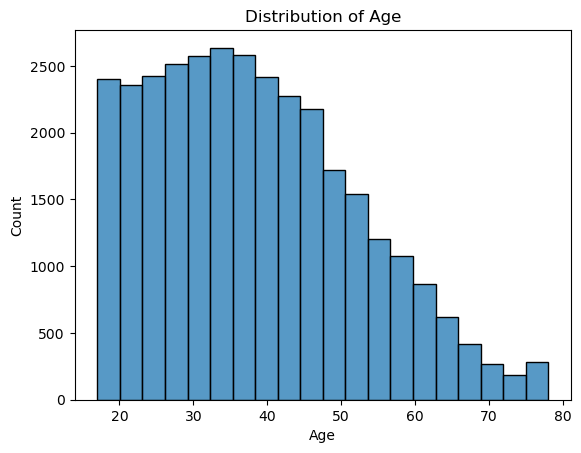

In [41]:
sns.histplot(df1['age'], bins = 20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

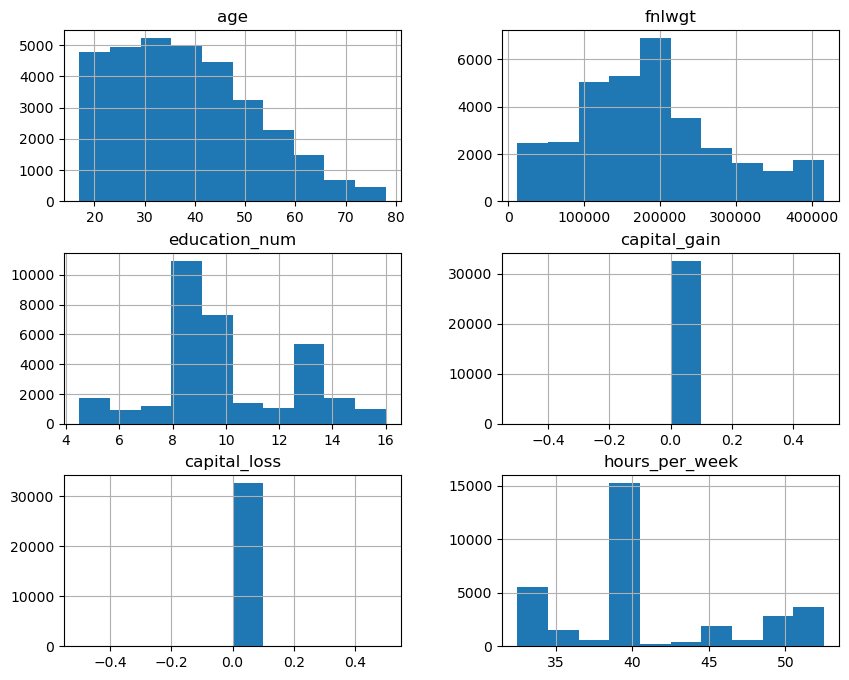

In [42]:
df1.hist(figsize=(10,8))
plt.show()

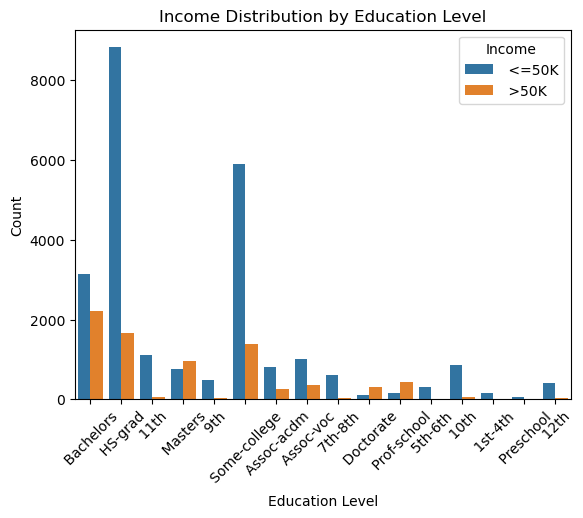

In [43]:
# Visualize the income distribution by education level
sns.countplot(x = 'education', hue = 'income', data = df1)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title = 'Income', loc='upper right')
plt.show()

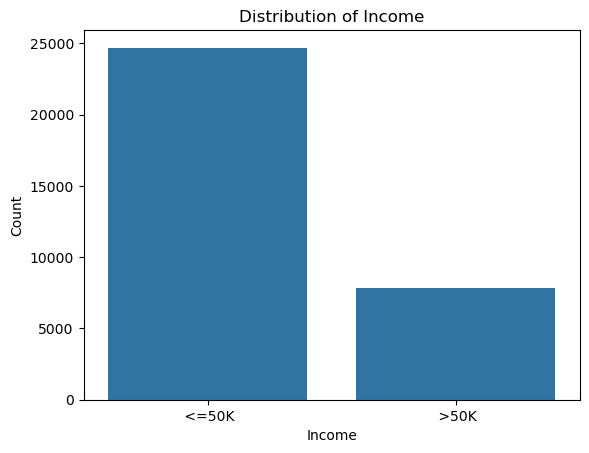

In [44]:
#visualize the distribution of income
sns.countplot(x = 'income',data = df1)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

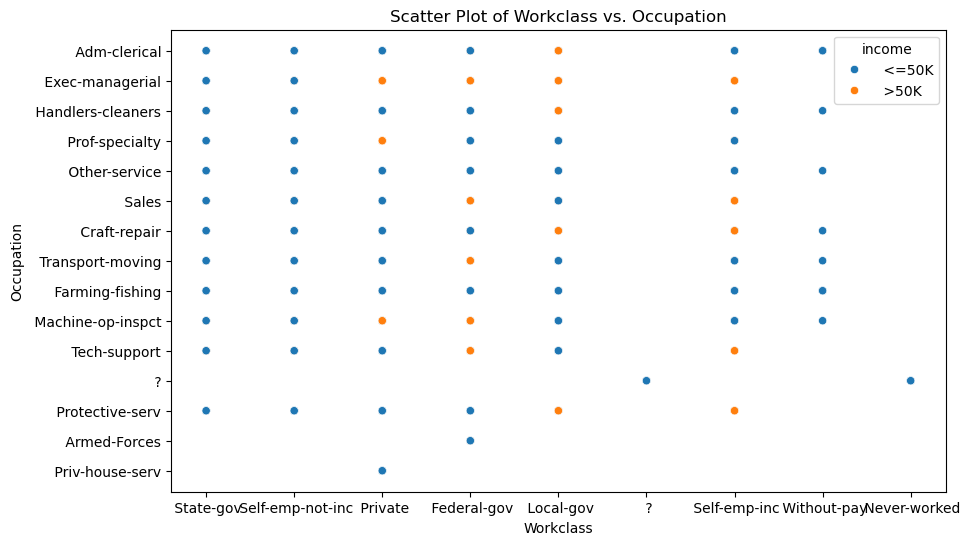

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='workclass', y='occupation', data=df, hue='income')
plt.title('Scatter Plot of Workclass vs. Occupation')
plt.xlabel('Workclass')
plt.ylabel('Occupation')
plt.show()

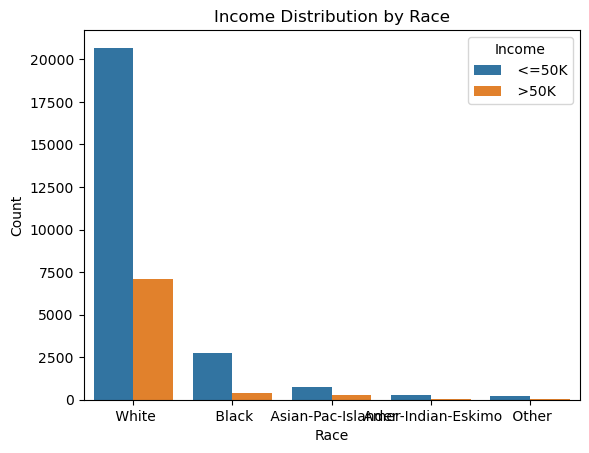

In [46]:
#visualize the income distribution by race
sns.countplot(x = 'race', hue='income', data = df1)
plt.title('Income Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Income', loc = 'upper right')
plt.show()

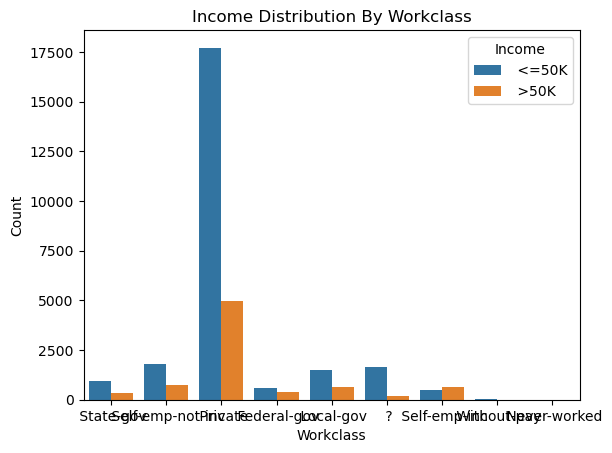

In [47]:
#Visualize the income distribution by workclass
sns.countplot(x = 'workclass', hue = 'income', data = df1)
plt.title('Income Distribution By Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.legend(title ='Income', loc ='upper right')
plt.show()

## Label Encoding📑

In [49]:
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])


## Splitting✂️

#### Splitting the Dataset
##### Process: Split the dataset into training and testing sets.
##### Example: 80% for training and 20% for testing.
##### Reason: Ensures the model can generalize to unseen data.

In [52]:
#Split data into features and target
X = data.drop('income', axis = 1)
y = data['income']

In [53]:
#Split data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

## Scale the data using StandardScaler⚙️

#### Feature Scaling
##### 🔹Process: Normalize or standardize numerical features like age, hours_per_week, capital_gain, and capital_loss.
##### 🔹Reason: Scaling ensures that features with larger numerical ranges don’t dominate model training.

In [56]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [57]:
# Calculate the correlation matrix
correlation_matrix = X_train.corr()

In [58]:
print(correlation_matrix)

                     age  workclass    fnlwgt  education  education_num  \
age             1.000000   0.004615 -0.073580  -0.005654       0.038749   
workclass       0.004615   1.000000 -0.015810   0.031097       0.055082   
fnlwgt         -0.073580  -0.015810  1.000000  -0.034105      -0.041892   
education      -0.005654   0.031097 -0.034105   1.000000       0.358946   
education_num   0.038749   0.055082 -0.041892   0.358946       1.000000   
marital_status -0.267700  -0.064170  0.032560  -0.039890      -0.071960   
occupation     -0.022075   0.252607  0.000529  -0.022093       0.106557   
relationship   -0.268453  -0.090721  0.010562  -0.015036      -0.095728   
race            0.027998   0.056271 -0.018715   0.016832       0.032338   
sex             0.089687   0.093693  0.025461  -0.020755       0.016599   
capital_gain    0.079644   0.029451  0.001656   0.029710       0.123857   
capital_loss    0.056354   0.012455 -0.010029   0.017050       0.083419   
hours_per_week  0.074627 

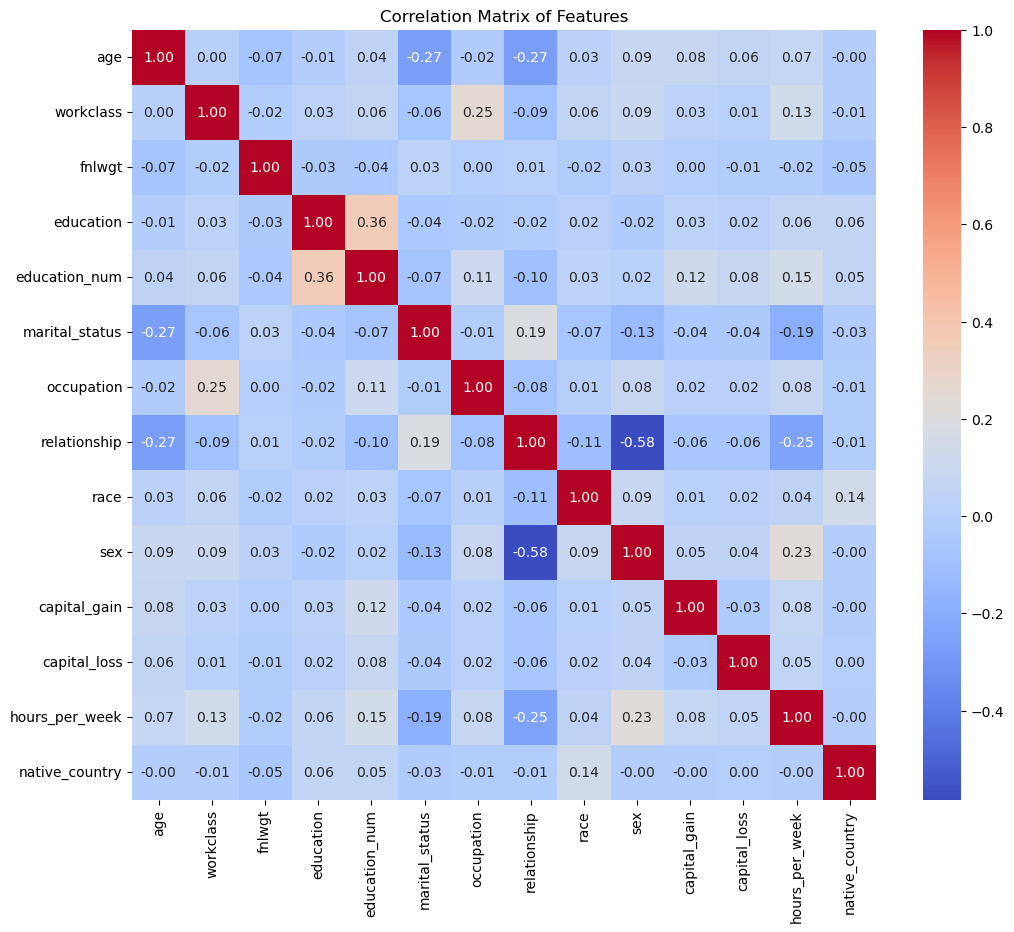

In [59]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

## Feature Selection✅

#### SelectKBest

In [62]:
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

In [63]:
#Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(10,'Score'))  

             Specs        Score
4    education_num  3248.948189
7     relationship  1731.251601
0              age  1532.360386
12  hours_per_week  1449.563730
10    capital_gain  1356.638827
9              sex  1280.050989
5   marital_status  1095.826285
11    capital_loss   579.441272
3        education   160.063145
6       occupation   148.137508


## Model Implementaion🤖

In [65]:
df1.shape

(32537, 15)

In [66]:
models = {
    '1.Logistic Regression':LogisticRegression(),
    '2.Decision Tree Classifier':DecisionTreeClassifier(),
    '3.Random Forest Classifier':RandomForestClassifier(),
    '4.Gradient Boosting Classifier':GradientBoostingClassifier(),
    '5.Support Vector Classifier':SVC()
}

#### 🔹1) LogisticRegression

In [68]:
model_1= LogisticRegression()
model_1.fit(X_train_scaled,y_train)

LogisticRegression()

In [69]:
y_pred = model_1.predict(X_test_scaled)

In [70]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [71]:
y_test

14160    0
27048    0
28868    1
5667     0
7827     0
        ..
1338     0
24534    1
18080    1
10354    0
24639    0
Name: income, Length: 6513, dtype: int32

In [72]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8254260709350529

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4942
           1       0.72      0.45      0.56      1571

    accuracy                           0.83      6513
   macro avg       0.78      0.70      0.72      6513
weighted avg       0.81      0.83      0.81      6513



In [74]:
#confusion Matrix = cm
cm = confusion_matrix(y_test,y_pred)
cm

array([[4662,  280],
       [ 857,  714]], dtype=int64)

<Axes: >

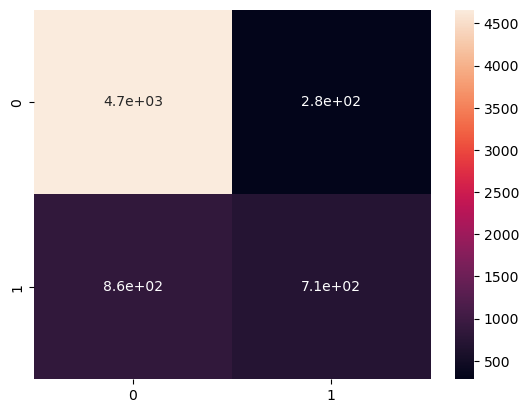

In [75]:
sns.heatmap(cm,annot=True)

In [76]:
fpr,tpr,_= roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)

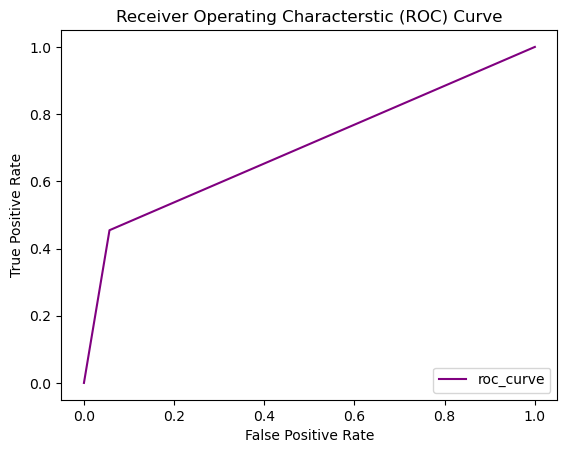

In [77]:
plt.figure()
plt.plot(fpr,tpr,color='purple',label='roc_curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) Curve')
plt.legend(loc ='lower right')


#### 🔹2) Decision Tree Classifier

In [79]:
model_2 = DecisionTreeClassifier(random_state=42,max_depth=10)
model_2.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [80]:
y_pred_dt = model_2.predict(X_test_scaled)
y_pred_dt

array([0, 1, 1, ..., 1, 0, 0])

In [81]:
accuracy_dt = accuracy_score(y_test,y_pred_dt)
accuracy_dt

0.8481498541378781

In [82]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4942
           1       0.76      0.55      0.64      1571

    accuracy                           0.85      6513
   macro avg       0.81      0.75      0.77      6513
weighted avg       0.84      0.85      0.84      6513



In [83]:
cm = confusion_matrix(y_test,y_pred_dt)
cm

array([[4663,  279],
       [ 710,  861]], dtype=int64)

<Axes: >

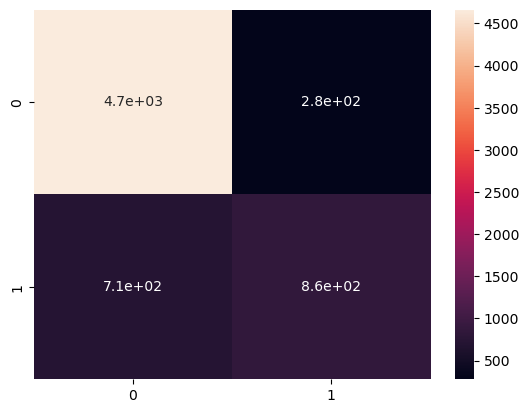

In [84]:
sns.heatmap(cm,annot=True)

In [85]:
fpr,tpr,_ = roc_curve(y_test,y_pred_dt)
roc_auc = auc(fpr,tpr)

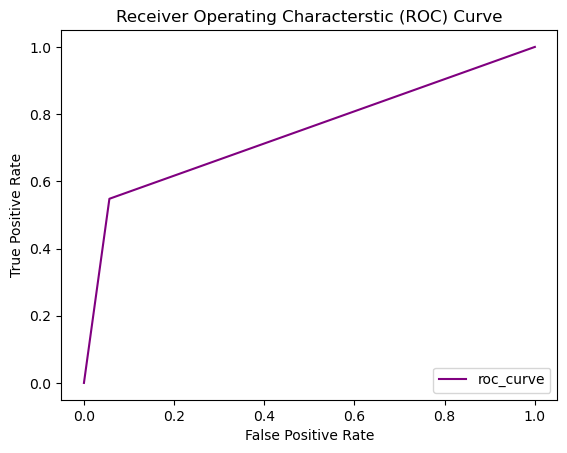

In [86]:
plt.figure()
plt.plot(fpr,tpr,color='purple',label='roc_curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) Curve')
plt.legend(loc ='lower right')


#### 🔹3) SVC

In [88]:
model_3 = SVC(probability=True)
model_3.fit(X_train_scaled,y_train)

SVC(probability=True)

In [89]:
y_pred_s = model_3.predict(X_test_scaled)
y_pred_s

array([0, 0, 1, ..., 1, 0, 0])

In [90]:
accuracy_s =accuracy_score(y_test,y_pred_s)
accuracy_s

0.8522954091816367

In [91]:
print(classification_report(y_test,y_pred_s))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4942
           1       0.77      0.55      0.64      1571

    accuracy                           0.85      6513
   macro avg       0.82      0.75      0.78      6513
weighted avg       0.85      0.85      0.84      6513



In [92]:
cm = confusion_matrix(y_test,y_pred_s)
cm

array([[4680,  262],
       [ 700,  871]], dtype=int64)

<Axes: >

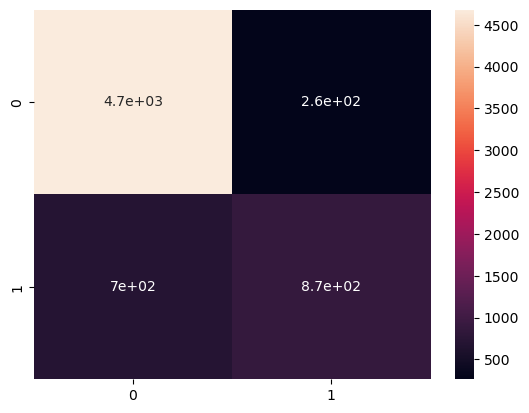

In [93]:
sns.heatmap(cm,annot=True)

In [94]:
fpr,tpr,_ = roc_curve(y_test,y_pred_s)
roc_auc = auc(fpr,tpr)

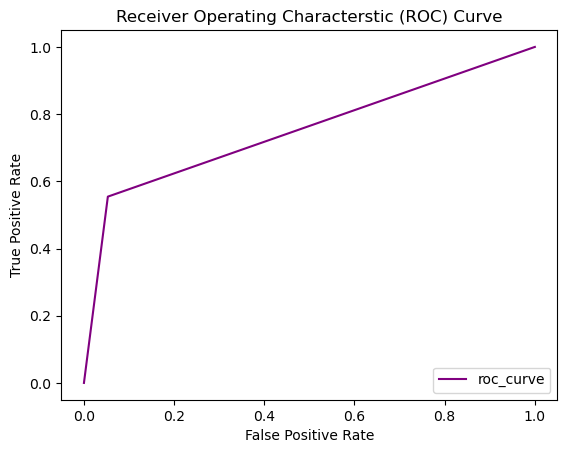

In [95]:
plt.figure()
plt.plot(fpr,tpr,color='purple',label='roc_curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) Curve')
plt.legend(loc ='lower right')


#### 🔹4) Random Forest Classifier

In [97]:
model_4 = RandomForestClassifier(max_depth=10,random_state=42,n_estimators=100)
model_4.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [98]:
y_pred_rf = model_4.predict(X_test_scaled)

In [99]:
accuracy_rf = accuracy_score(y_test,y_pred_rf)
accuracy_rf

0.8555197297712268

In [100]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4942
           1       0.80      0.54      0.64      1571

    accuracy                           0.86      6513
   macro avg       0.83      0.75      0.78      6513
weighted avg       0.85      0.86      0.84      6513



In [101]:
cm = confusion_matrix(y_test,y_pred_rf)
cm

array([[4731,  211],
       [ 730,  841]], dtype=int64)

<Axes: >

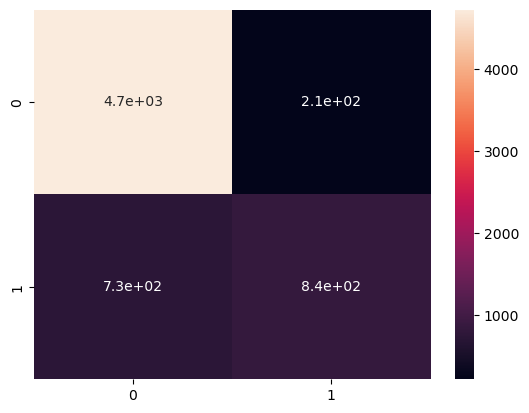

In [102]:
sns.heatmap(cm,annot=True)

In [103]:
fpr,tpr,_ = roc_curve(y_test,y_pred_rf)
roc_auc = auc(fpr,tpr)

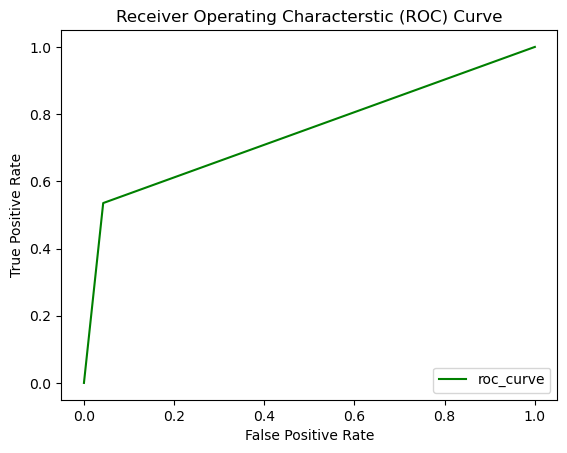

In [104]:
plt.figure()
plt.plot(fpr,tpr,color='green',label='roc_curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) Curve')
plt.legend(loc ='lower right')

#### 🔹5) Gradient Boosting Classifier

In [106]:
model_5 = GradientBoostingClassifier(n_estimators=100,max_depth=5,learning_rate=0.1,random_state=42)
model_5.fit(X_train_scaled,y_train)

GradientBoostingClassifier(max_depth=5, random_state=42)

In [107]:
y_pred_gr = model_5.predict(X_test_scaled)

In [108]:
accuracy_gr = accuracy_score(y_test,y_pred_gr)
accuracy_gr

0.8654997696913864

In [109]:
print(classification_report(y_test,y_pred_gr))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4942
           1       0.77      0.62      0.69      1571

    accuracy                           0.87      6513
   macro avg       0.83      0.78      0.80      6513
weighted avg       0.86      0.87      0.86      6513



In [110]:
cm = confusion_matrix(y_test,y_pred_gr)
cm

array([[4656,  286],
       [ 590,  981]], dtype=int64)

<Axes: >

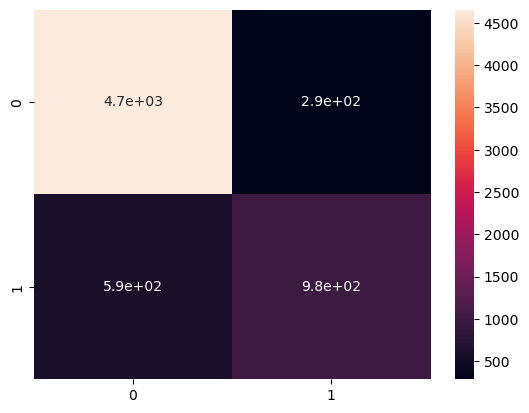

In [111]:
sns.heatmap(cm,annot= True)

In [112]:
fpr,tpr,_ = roc_curve(y_test,y_pred_gr)
roc_auc = auc(fpr,tpr)

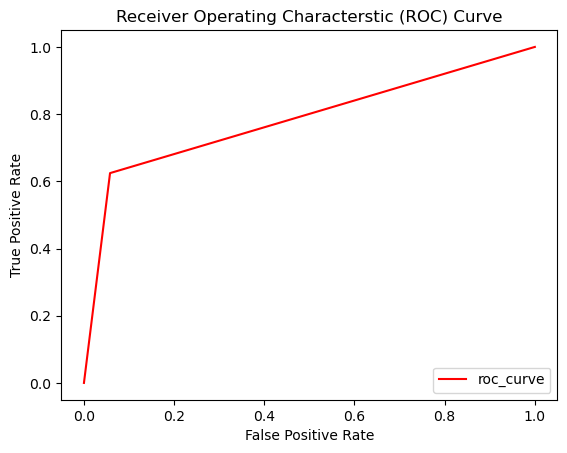

In [113]:
plt.figure()
plt.plot(fpr,tpr,color='red',label='roc_curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) Curve')
plt.legend(loc ='lower right')

In [114]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'SVM', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [accuracy, accuracy_dt, accuracy_s, accuracy_rf, accuracy_gr]
})

In [115]:
results = results.sort_values(by='Accuracy', ascending=False)
print(results)

                 Model  Accuracy
4    Gradient Boosting  0.865500
3        Random Forest  0.855520
2                  SVM  0.852295
1        Decision Tree  0.848150
0  Logistic Regression  0.825426


In [116]:
best_model_name = results['Model'].iloc[0]
best_accuracy = results['Accuracy'].iloc[0]

In [117]:
print(f"\nThe best model is: {best_model_name} with an accuracy of {best_accuracy}")


The best model is: Gradient Boosting with an accuracy of 0.8654997696913864


#### ✳️Reason for Best Model Selection:
##### 🔹Performance:GradientBoosting often outperforms due to its advanced boosting technique, which minimizes errors iteratively.
##### 🔹Feature Handling: It can handle both categorical and numerical features efficiently.
##### 🔹Robustness: It works well with noisy or incomplete data.

## Hyperparameter Tuning⚙️🔧🧑‍💻💻🔍⚡

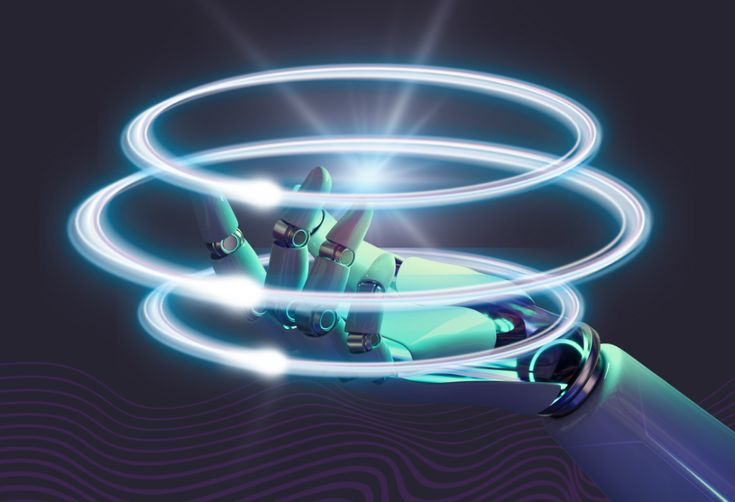

In [121]:
# hyperparameter tuning using RandomizedSearchCV for GradientBoostingClassifier

param_distributions = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [122]:
gb_classifier = GradientBoostingClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=gb_classifier, param_distributions=param_distributions, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': array([ 50, 100, 150, 200])},
                   random_state=42, scoring='accuracy')

In [123]:
print("\nBest hyperparameters (Randomized Search):", random_search.best_params_)
print("Best accuracy (Randomized Search):", random_search.best_score_)


Best hyperparameters (Randomized Search): {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Best accuracy (Randomized Search): 0.8718137772031207


In [124]:
best_gb_model = random_search.best_estimator_
y_pred_gb_tuned = best_gb_model.predict(X_test_scaled)
accuracy_gb_tuned = accuracy_score(y_test,y_pred_gb_tuned)
print(f"Accuracy of tuned Gradient Boosting: {accuracy_gb_tuned}")

Accuracy of tuned Gradient Boosting: 0.8654997696913864


## Create the Pipeline🛠️🚰

In [127]:

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),  # Handle missing Values
    ('scaler', StandardScaler()),                   
    ('model', GradientBoostingClassifier())
])

#Train the pipeline
pipeline.fit(X_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', GradientBoostingClassifier())])

In [128]:
# Make predictions on the test data
y_pred_pipeline = pipeline.predict(X_test)

In [129]:
# Evaluate the pipeline
accuracy_pipeline = accuracy_score(y_test, y_pred_pipeline)
print(f"Accuracy of the pipeline: {accuracy_pipeline}")

Accuracy of the pipeline: 0.8708736373407032


In [130]:
# Initialize and train the model
model = GradientBoostingClassifier(random_state = 42)
model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [131]:
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [132]:
# save the trained pipeline
joblib.dump(pipeline,'trained_pipeline.pkl')

['trained_pipeline.pkl']

In [133]:
joblib.dump(best_gb_model, 'best_gb_model.joblib') 

['best_gb_model.joblib']

In [134]:
# Load the trained pipeline
loaded_pipeline = joblib.load('trained_pipeline.pkl')

In [135]:
# Load the trained model
loaded_model = joblib.load('best_gb_model.joblib')

## Test with Unseen Data

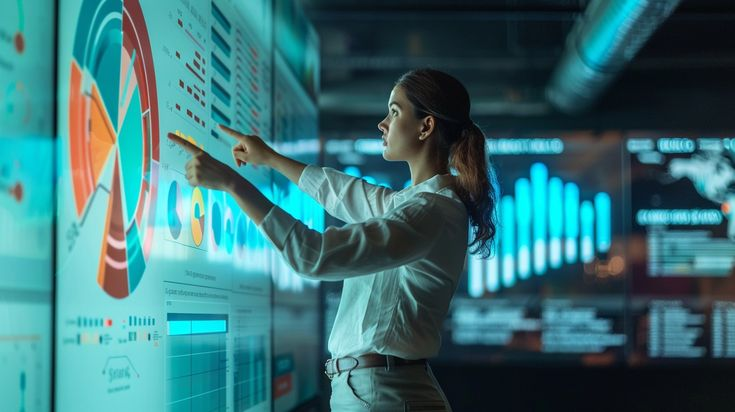

In [138]:
unseen_data = pd.read_csv('unseen data.csv')

In [139]:
unseen_df = pd.DataFrame(unseen_data)

In [140]:
unseen_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [141]:
unseen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             14 non-null     int64 
 1   workclass       14 non-null     object
 2   fnlwgt          14 non-null     int64 
 3   education       14 non-null     object
 4   education_num   14 non-null     int64 
 5   marital_status  14 non-null     object
 6   occupation      14 non-null     object
 7   relationship    14 non-null     object
 8   race            14 non-null     object
 9   sex             14 non-null     object
 10  capital_gain    14 non-null     int64 
 11  capital_loss    14 non-null     int64 
 12  hours_per_week  14 non-null     int64 
 13  native_country  14 non-null     object
dtypes: int64(6), object(8)
memory usage: 1.7+ KB


In [142]:
# Apply LabelEncoder to the unseen data
le = LabelEncoder()
for col in unseen_df.columns:
  if unseen_df[col].dtype == 'object':
    unseen_df[col] = le.fit_transform(unseen_df[col])


In [143]:
#Scaling the unseen data
X_test_unseen_scaled = scaler.transform(unseen_df)

In [144]:
unseen_df.shape

(14, 14)

In [145]:
print(f"Train features: {loaded_pipeline.feature_names_in_}")

Train features: ['age' 'workclass' 'fnlwgt' 'education' 'education_num' 'marital_status'
 'occupation' 'relationship' 'race' 'sex' 'capital_gain' 'capital_loss'
 'hours_per_week' 'native_country']


In [146]:
predictions = loaded_model.predict(X_test_unseen_scaled)
print(f"Predictions: {predictions}")

Predictions: [0 0 0 0 0 0 0 1 1 1 1 0 0 0]


## Conclusion💡
#### The Adult dataset analysis project revealed that factors such as education level, occupation, age, and marital status
#### significantly influences an individual's income exceeding $50,000 per year. Machine Learning models, including Logistic Regression,
#### Random Forest Classifier, Decision Tree, SVM, Gradient Boosting were trained and evaluated on the preprocessed data.
#### Here Gradient Boosting Classifier achieved the highest accuracy of 86%. This analysis provides valuable insights into socioeconomic factors   
#### contributing to income inequality.

## NB:

## 1. EDA (Exploratory Data Analysis) in Machine Learning
##### Exploratory Data Analysis (EDA) is the process of analyzing and visualizing data before applying machine learning models. The goal is to understand patterns, detect anomalies, and check assumptions in the dataset.

### ❓ Why is EDA Important?
##### ✔ Understands data quality
##### ✔ Identifies missing values & outliers
##### ✔ Helps in feature selection
##### ✔ Prevents biased models
##### ✔ Saves time by avoiding useless features

## 2. Encoding in Machine Learning
##### Encoding is the process of converting categorical variables (text labels) into numerical values so that machine learning models can understand them.

### ❓ Why Do We Need Encoding?
##### Most ML models can’t work with categorical data directly. Encoding helps in:
##### ✔ Converting text labels into numbers
##### ✔ Making data compatible with ML models
##### ✔ Handling ordinal and nominal categorical features

## 3. Feature Scaling in Machine Learning
##### Feature scaling is the process of normalizing or standardizing numerical data so that all features contribute equally to the model. This prevents certain features from dominating others due to differences in scale.

### ❓ Why is Feature Scaling Important?
#####  ✔Improves Model Performance: ML models like KNN, SVM, and Gradient Descent-based algorithms work better when features are on a similar scale.
#####  ✔Faster Convergence: Scaling speeds up training, especially for deep learning models.
#####  ✔Prevents Dominance of Large Values: A feature with large values (e.g., salary in thousands) can dominate smaller features (e.g., age).
#####  ✔Required for Distance-Based Algorithms: KNN, K-Means, and PCA use distance calculations, so different scales can distort results.

## 4. Feature Selection in Machine Learning
##### Feature selection is the process of choosing the most important features from a dataset to improve model performance. 

### ❓ Why is Feature Selection Important?
#####  ✔Removes Noise – Keeps only relevant data.
#####  ✔Reduces Overfitting – Less chance of learning noise instead of patterns.
#####  ✔Improves Model Efficiency – Fewer features = faster training.
#####  ✔Better Interpretability – Simpler models are easier to understand.

## 5. Train-Test Split in Machine Learning
##### In machine learning, train-test split is the process of dividing the dataset into two parts:
##### 1)Training Set – Used to train the model.
##### 2)Testing Set – Used to evaluate the model’s performance.

### ❓ Why Do We Need Train-Test Split?
##### ✔ Prevents overfitting (model memorizing data instead of learning patterns).
##### ✔ Ensures the model generalizes well to new data.
##### ✔ Helps measure accuracy, precision, recall, and other metrics.

## 6. Model Evaluation in Machine Learning
##### Model evaluation is the process of assessing how well a trained machine learning model performs on unseen data. It helps determine if the model is accurate, reliable, and generalizes well to new inputs.

### ❓ Why is Model Evaluation Important?
##### ✔ Ensures the model performs well on new data
##### ✔ Prevents overfitting (memorizing training data instead of learning patterns)
##### ✔ Helps in choosing the best model
##### ✔ Guides hyperparameter tuning

## 7. Hyperparameter tuning in Machine Learning
##### Hyperparameter tuning in machine learning refers to the process of selecting the best set of hyperparameters for a model to improve its performance. 

### ❓ Why Hyperparameter Tuning is Important in Machine Learning?
#####  ✔Improves Model Performance
#####  ✔Prevents Overfitting & Underfitting
#####  ✔Enhances Generalization
#####  ✔Tailors the Model to Specific Problems